# Prepare a classification model using SVM for salary data 

|Data|Description|
|:---|:----|
|age|age of a person|
|workclass|A work class is a grouping of work| 
|education|Education of an individuals|
|maritalstatus|Marital status of an individual|	
|occupation|occupation of an individual|
|relationship|| 	
|race|Race of an Individual|
|sex|Gender of an Individual|
|capitalgain|profit received from the sale of an investment|	
|capitalloss|A decrease in the value of a capital asset|
|hoursperweek|number of hours work per week|	
|native|Native of an individual|
|Salary|salary of an individual|

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('SalaryData_Test.csv')
df_train = pd.read_csv('SalaryData_Train.csv')
df_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train.duplicated().sum()
df_train.drop_duplicates(inplace=True)

In [4]:
df_train.shape

(26903, 14)

In [5]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
df_train.Salary.unique()
df_train['Salary'] = df_train['Salary'].map({' <=50K':0, ' >50K':1})
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
df_test['Salary'] = df_test['Salary'].map({' <=50K':0, ' >50K':1})
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [8]:
columns = ['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native']

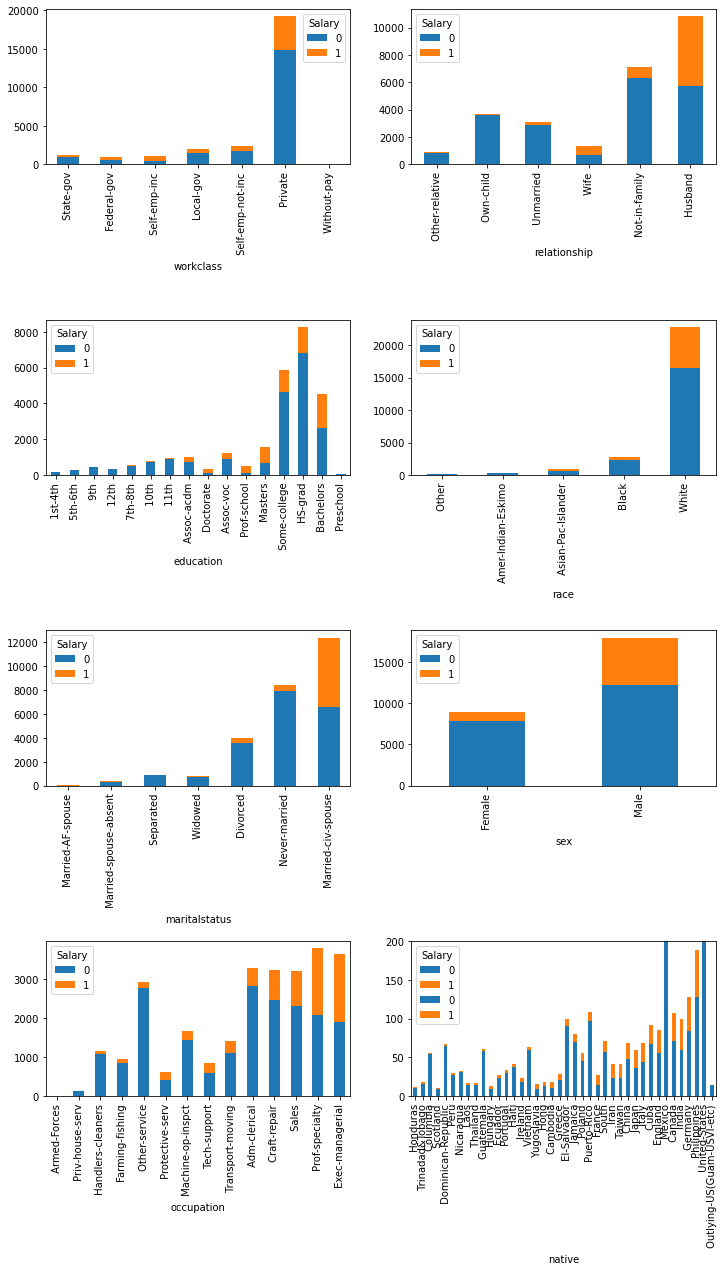

In [9]:
fig, axes = plt.subplots(4,2,figsize=(12,20))
plt.subplots_adjust(hspace=1)
for i,col in enumerate(columns):
    if i<4:
        df_train.groupby([col,'Salary']).size().unstack().sort_values(by=1).plot(kind='bar',stacked=True,ax= axes[i][0]);
    if i>=4:
        if i==7:
            i-=4 
            df_train.groupby([col,'Salary']).size().unstack().sort_values(by=1).plot(kind='bar',stacked=True,ax = axes[i][1]);
            plt.ylim(0,200);
        if i<7:    
            i=i-4
            df_train.groupby([col,'Salary']).size().unstack().sort_values(by=1).plot(kind='bar',stacked=True,ax = axes[i][1]);

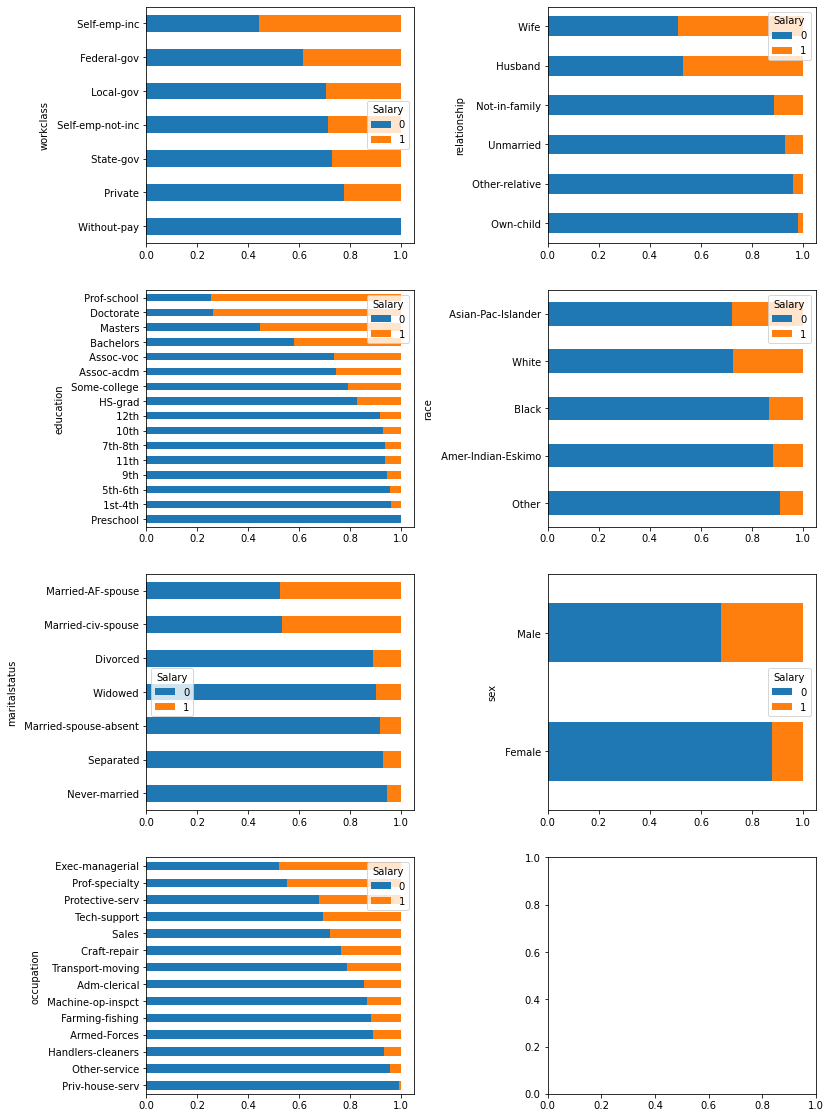

In [10]:
fig, axes = plt.subplots(4,2,figsize=(12,20))
plt.subplots_adjust(wspace=0.5)
for i,col in enumerate(columns):
    if i<4:
        pd.crosstab(df_train[col],df_train['Salary'],normalize='index').sort_values(by=1).plot(kind='barh',stacked=True,ax=axes[i][0])
        #plt.legend(bbox_to_anchor=(1,1));
    if i>=4:
        if i==7:
            break
        i-=4
        pd.crosstab(df_train[col],df_train['Salary'],normalize='index').sort_values(by=1).plot(kind='barh',stacked=True,ax=axes[i][1])
        #plt.legend(bbox_to_anchor=(1,1));

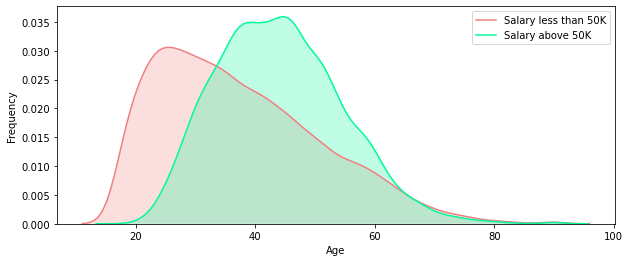

In [11]:
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df_train.loc[(df_train['Salary'] == 0),'age'] , color='#F08080',shade=True,label='Salary less than 50K')
ax=sns.kdeplot(df_train.loc[(df_train['Salary'] == 1),'age'] , color='#00FA9A',shade=True, label='Salary above 50K')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency');

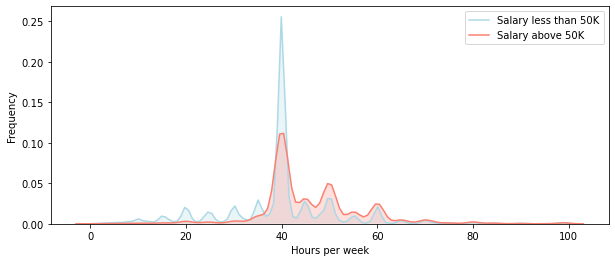

In [12]:
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df_train.loc[(df_train['Salary'] == 0),'hoursperweek'] , color='lightblue',shade=True,label='Salary less than 50K')
ax=sns.kdeplot(df_train.loc[(df_train['Salary'] == 1),'hoursperweek'] , color='Salmon',shade=True, label='Salary above 50K')
ax.set_xlabel('Hours per week')
ax.set_ylabel('Frequency');

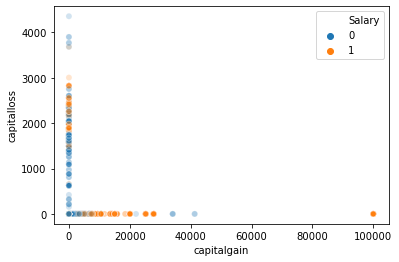

In [13]:
#plt.figure(figsize=(15,10))
sns.scatterplot(data=df_train,x='capitalgain',y='capitalloss',hue='Salary',alpha=0.2);
#plt.yticks(np.arange(0,4600,100))
#plt.xticks(np.arange(0,50000,1000),rotation=90);
#plt.xlim(-100,10000)
#plt.ylim(-100,3000);

In [14]:
# Let's engineer our features based on our observations

# workclass can have three categories: 
#1-[' Self-emp-not-inc',' Federal-gov'] 2-[' State-gov','  Private',' Local-gov',' Self-emp-inc'] 3- ' Without-pay'
df_train['workclass'] = df_train['workclass'].map({' Self-emp-not-inc':1,' Federal-gov':1,' State-gov':2,' Private':2,' Local-gov':2,' Self-emp-inc':2,' Without-pay':3})
df_test['workclass'] = df_test['workclass'].map({' Self-emp-not-inc':1,' Federal-gov':1,' State-gov':2,' Private':2,' Local-gov':2,' Self-emp-inc':2,' Without-pay':3})

# education can have 3 categories
# 3- [' Prof-school',' Bachelors',' Masters',' Doctorate'] 2-[' Assoc-acdm',' Assoc-voc',' HS-grad',' Some-college']
# 1- [' 11th',' 9th',' 7th-8th',' 5th-6th',' 10th',' Preschool',' 12th',' 1st-4th']
df_train['education'] = df_train['education'].map({' Prof-school':3,' Bachelors':3,' Masters':3,' Doctorate':3,' Assoc-acdm':2,' Assoc-voc':2,' HS-grad':2,' Some-college':2,' 11th':1,' 9th':1,' 7th-8th':1,' 5th-6th':1,' 10th':1,' Preschool':1,' 12th':1,' 1st-4th':1})
df_test['education'] = df_test['education'].map({' Prof-school':3,' Bachelors':3,' Masters':3,' Doctorate':3,' Assoc-acdm':2,' Assoc-voc':2,' HS-grad':2,' Some-college':2,' 11th':1,' 9th':1,' 7th-8th':1,' 5th-6th':1,' 10th':1,' Preschool':1,' 12th':1,' 1st-4th':1})

# relationship in 2 classes
# 1- [' Husband',' Wife'], 0- [' Not-in-family',' Own-child',' Unmarried',' Other-relative']
df_train['relationship'] = df_train['relationship'].map({' Husband':1,' Wife':1,' Not-in-family':0,' Own-child':0,' Unmarried':0,' Other-relative':0})
df_test['relationship'] = df_test['relationship'].map({' Husband':1,' Wife':1,' Not-in-family':0,' Own-child':0,' Unmarried':0,' Other-relative':0})

# race into 2
# 1- [' White',' Asian-Pac-Islander'] 0-[' Black',' Amer-Indian-Eskimo',' Other']
df_train['race'] = df_train['race'].map({' White':1,' Asian-Pac-Islander':1,' Black':0,' Amer-Indian-Eskimo':0,' Other':0})
df_test['race'] = df_test['race'].map({' White':1,' Asian-Pac-Islander':1,' Black':0,' Amer-Indian-Eskimo':0,' Other':0})

# marital status 2
# 1-[' Married-civ-spouse',' Married-AF-spouse'] 0-[' Never-married',' Divorced',' Married-spouse-absent',' Separated',' Widowed']
df_train['maritalstatus'] = df_train['maritalstatus'].map({' Married-civ-spouse':1,' Married-AF-spouse':1,' Never-married':0,' Divorced':0,' Married-spouse-absent':0,' Separated':0,' Widowed':0})
df_test['maritalstatus'] = df_test['maritalstatus'].map({' Married-civ-spouse':1,' Married-AF-spouse':1,' Never-married':0,' Divorced':0,' Married-spouse-absent':0,' Separated':0,' Widowed':0})

# occupation 3
list1=[' Adm-clerical',' Handlers-cleaners',' Other-service',' Farming-fishing',' Machine-op-inspct',' Armed-Forces',' Priv-house-serv'] 
list2=[' Sales',' Tech-support',' Protective-serv',' Transport-moving',' Craft-repair'] 
list3=[' Exec-managerial',' Prof-specialty']
dict1={}
for el1 in list1:
    dict1[el1]=1
for el2 in list2:
    dict1[el2]=2
for el3 in list3:
    dict1[el3]=3
df_train['occupation'] = df_train['occupation'].map(dict1)
df_test['occupation'] = df_test['occupation'].map(dict1)

# native 
list1=[' United-States', ' Cuba',' Greece', ' China', ' Hong', ' Philippines', ' Canada', ' Germany',' England', ' Italy', ' Yugoslavia', ' Cambodia', ' Japan', ' India',' Iran', ' France', ' Taiwan']
list0=[' Outlying-US(Guam-USVI-etc)', ' Dominican-Republic', ' Columbia',' Guatemala', ' Mexico', ' Nicaragua', ' Peru', ' Vietnam', ' Honduras',' El-Salvador', ' Haiti', ' Puerto-Rico', ' Trinadad&Tobago',' Portugal', ' Laos', ' Jamaica', ' Ecuador', ' Thailand', ' Scotland',' Poland', ' South', ' Ireland', ' Hungary']
dict1={}
for el0 in list0:
    dict1[el0]=0
for el1 in list1:
    dict1[el1]=1
df_train['native'] = df_train['native'].map(dict1)
df_test['native'] = df_test['native'].map(dict1)

# sex
df_train['sex'] = df_train['sex'].map({' Male':1,' Female':0})
df_test['sex'] = df_test['sex'].map({' Male':1,' Female':0})

# 1800-3100 - capitalloss 4300-29000 -capitalgain
df_train.loc[(df_train['capitalgain']>4300) & (df_train['capitalgain']<29000),'capitalgain'] = 1
df_train.loc[(df_train['capitalgain']<4300) | (df_train['capitalgain']>29000),'capitalgain'] = 0
df_test.loc[(df_test['capitalgain']>4300) & (df_test['capitalgain']<29000),'capitalgain'] = 1
df_test.loc[(df_test['capitalgain']<4300) | (df_test['capitalgain']>29000),'capitalgain'] = 0

df_train.loc[(df_train['capitalloss']>1800) & (df_train['capitalloss']<3100),'capitalloss'] = 1
df_train.loc[(df_train['capitalloss']<1800) | (df_train['capitalloss']>3100),'capitalloss'] = 0
df_test.loc[(df_test['capitalloss']>1800) & (df_test['capitalloss']<3100),'capitalloss'] = 1
df_test.loc[(df_test['capitalloss']<1800) | (df_test['capitalloss']>3100),'capitalloss'] = 0

In [15]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,0,1,0,0,1,0,0,40,1,0
1,38,2,2,9,1,1,1,1,1,0,0,50,1,0
2,28,2,2,12,1,2,1,1,1,0,0,40,1,1
3,44,2,2,10,1,1,1,0,1,0,0,40,1,1
4,34,2,1,6,0,1,0,1,1,0,0,30,1,0


In [16]:
df = pd.get_dummies(df_train[['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'capitalgain','capitalloss', 'native']],columns=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'capitalgain','capitalloss', 'native'],drop_first=True)
dft = pd.get_dummies(df_test[['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'capitalgain','capitalloss', 'native']],columns=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'capitalgain','capitalloss', 'native'],drop_first=True)

In [17]:
df.head()

,workclass_2,workclass_3,education_2,education_3,maritalstatus_1,occupation_2,occupation_3,relationship_1,race_1,native_1
0,1,0,0,1,0,0,0,0,1,1
1,0,0,0,1,1,0,1,1,1,1
2,1,0,1,0,0,0,0,0,1,1
3,1,0,0,0,1,0,0,1,0,1
4,1,0,0,1,1,0,1,1,0,1


In [18]:
df_train.drop(columns=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'capitalgain','capitalloss', 'native'],inplace=True)
df_train = pd.concat([df_train,df],axis=1)
df_train.head(10)

,age,educationno,sex,hoursperweek,Salary,workclass_2,workclass_3,education_2,education_3,maritalstatus_1,occupation_2,occupation_3,relationship_1,race_1,native_1
0,39,13,1,40,0,1,0,0,1,0,0,0,0,1,1
1,50,13,1,13,0,0,0,0,1,1,0,1,1,1,1
2,38,9,1,40,0,1,0,1,0,0,0,0,0,1,1
3,53,7,1,40,0,1,0,0,0,1,0,0,1,0,1
4,28,13,0,40,0,1,0,0,1,1,0,1,1,0,1
5,37,14,0,40,0,1,0,0,1,1,0,1,1,1,1
6,49,5,0,16,0,1,0,0,0,0,0,0,0,0,0
7,52,9,1,45,1,0,0,1,0,1,0,1,1,1,1
8,31,14,0,50,1,1,0,0,1,0,0,1,0,1,1
9,42,13,1,40,1,1,0,0,1,1,0,1,1,1,1


In [19]:
df_test.drop(columns=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'capitalgain','capitalloss', 'native'],inplace=True)
df_test = pd.concat([df_test,dft],axis=1)
df_test.head(10)

,age,educationno,sex,hoursperweek,Salary,workclass_2,workclass_3,education_2,education_3,maritalstatus_1,occupation_2,occupation_3,relationship_1,race_1,native_1
0,25,7,1,40,0,1,0,0,0,0,0,0,0,0,1
1,38,9,1,50,0,1,0,1,0,1,0,0,1,1,1
2,28,12,1,40,1,1,0,1,0,1,1,0,1,1,1
3,44,10,1,40,1,1,0,1,0,1,0,0,1,0,1
4,34,6,1,30,0,1,0,0,0,0,0,0,0,1,1
5,63,15,1,32,1,0,0,0,1,1,0,1,1,1,1
6,24,10,0,40,0,1,0,1,0,0,0,0,0,1,1
7,55,4,1,10,0,1,0,0,0,1,1,0,1,1,1
8,65,9,1,40,1,1,0,1,0,1,0,0,1,1,1
9,36,13,1,40,0,0,0,0,1,1,0,0,1,1,1


In [20]:
X_train = df_train.drop(columns=['educationno','Salary'])
y_train = df_train['Salary']
X_test = df_test.drop(columns=['educationno','Salary'])
y_test = df_test['Salary']

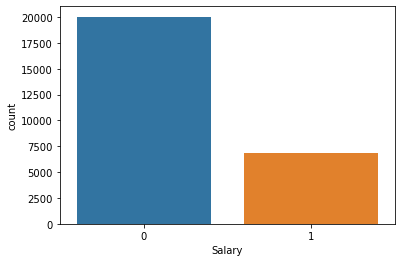

In [21]:
sns.countplot(df_train['Salary']);

In [22]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train,y_train)
scaler.fit(X_test)

StandardScaler()

In [23]:
#param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3],'gamma':['scale','auto']}
param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear','rbf']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid,verbose=2)

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.01, kernel=linear, total=  13.2s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.1s remaining:    0.0s


[CV] ............................ C=0.01, kernel=linear, total=   8.7s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   8.6s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   9.6s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   9.3s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=  19.8s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=  19.7s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=  20.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.9min finished


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [25]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [26]:
y_pred = grid.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8314 3046]
 [ 655 3045]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     11360
           1       0.50      0.82      0.62      3700

    accuracy                           0.75     15060
   macro avg       0.71      0.78      0.72     15060
weighted avg       0.82      0.75      0.77     15060



# Thank you!

In [28]:
dfcolumns = df_train.select_dtypes(include='object').columns.tolist()
for col in dfcolumns:
    print(col, df_train[col].unique())

    
pd.crosstab(df_train['native'],df_train['Salary'],normalize='index').sort_values(by=1).index

KeyError: 'native'